In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

### 1
一元线性回归，回归系数检验

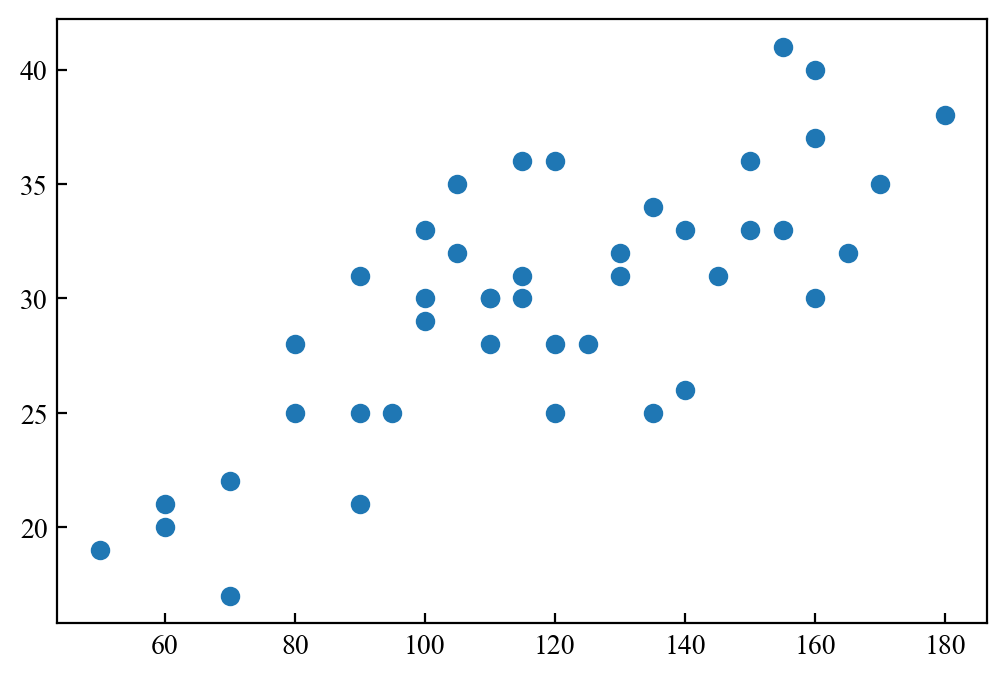

In [2]:
data = pd.read_excel('../../../hw/10第10章  回归分析习题解答/ti10_1.xlsx', header=None).values
t, a = data[::2].flatten(), data[1::2].flatten()
t, a = t[~np.isnan(t)], a[~np.isnan(a)]
plt.scatter(t, a)
plt.show()

In [3]:
mod_dic = {'T': t, 'A': a}
mod = sm.formula.ols('A~T', mod_dic).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     55.21
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.10e-09
Time:                        22:04:52   Log-Likelihood:                -116.50
No. Observations:                  43   AIC:                             237.0
Df Residuals:                      41   BIC:                             240.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4106      2.149      6.705      0.0

In [4]:
from scipy.stats import f, t
k = len(a)  # 数据的个数
r = 1       # 自变量个数
fa = f.ppf(0.95, r, k-r-1)
print(f'{mod.fvalue = }\n{fa = }\n')

ta = t.ppf(0.975, k-r-1)
print("mod.tvalues:\n", mod.tvalues.values, sep='')
print(f'{ta = }\n')

print("残差方差：", mod.mse_resid)

mod.fvalue = 55.20750857862567
fa = 4.078545731291291

mod.tvalues:
[6.70463037 7.43017554]
ta = 2.0195409639828936

残差方差： 13.850391176256064


### 2
多元线性回归，野值检验

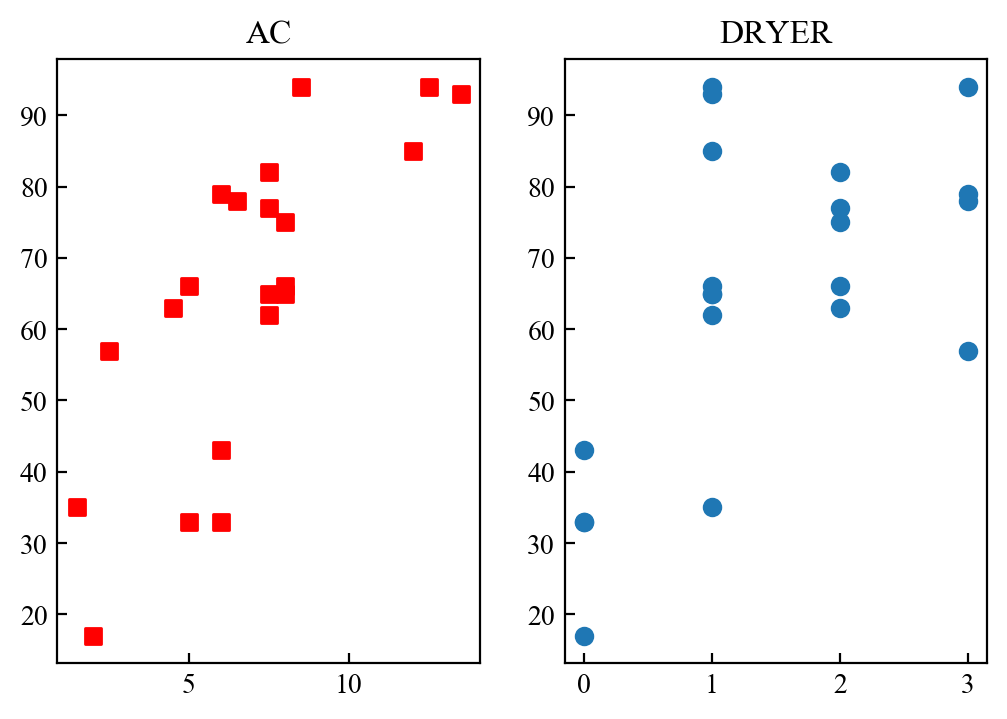

In [5]:
data = pd.read_excel('../../../hw/10第10章  回归分析习题解答/ti10_2.xlsx', header=None).values
ind, kwh = data[::4].flatten()[:-1], data[1::4].flatten()[:-1]
ac, dryer = data[2::4].flatten()[:-1], data[3::4].flatten()[:-1]

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(ac, kwh, marker='s', c='r')
ax.set_title('AC')
ax1 = fig.add_subplot(122)
ax1.scatter(dryer, kwh, marker='o')
ax1.set_title('DRYER')
fig.show()

In [6]:
df = pd.DataFrame({'AC': ac, 'DRYER': dryer, 'KWH': kwh})
mod = sm.formula.ols('KWH ~ AC + DRYER', df).fit()
print(mod.summary())
print('\n残差的方差', mod.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                    KWH   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     300.2
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.50e-14
Time:                        22:04:52   Log-Likelihood:                -56.949
No. Observations:                  21   AIC:                             119.9
Df Residuals:                      18   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1054      2.481      3.267      0.0

In [7]:
print(mod.outlier_test())

    student_resid   unadj_p   bonf(p)
0        1.636102  0.120196  1.000000
1        1.032433  0.316335  1.000000
2        1.101728  0.285935  1.000000
3       -0.596637  0.558612  1.000000
4       -0.058711  0.953867  1.000000
5       -0.421888  0.678394  1.000000
6       -0.618687  0.544324  1.000000
7        0.242816  0.811053  1.000000
8        1.267356  0.222114  1.000000
9        1.802585  0.089210  1.000000
10      -1.521876  0.146423  1.000000
11      -0.012546  0.990136  1.000000
12       0.376249  0.711386  1.000000
13      -0.853774  0.405100  1.000000
14      -0.080472  0.936801  1.000000
15      -0.527590  0.604602  1.000000
16       0.567504  0.577790  1.000000
17      -1.331661  0.200553  1.000000
18      -0.666818  0.513838  1.000000
19       0.692306  0.498094  1.000000
20      -2.465408  0.024628  0.517187


In [8]:
df1 = df.drop(20)     # 删除序号为 20 的异常点
mod1 = sm.formula.ols('KWH ~ AC + DRYER', df1).fit()
print(mod1.summary())
print('\n残差的方差', mod1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                    KWH   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     343.9
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.78e-14
Time:                        22:04:52   Log-Likelihood:                -51.669
No. Observations:                  20   AIC:                             109.3
Df Residuals:                      17   BIC:                             112.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7966      2.296      4.267      0.0

In [9]:
print(mod1.outlier_test())

    student_resid   unadj_p  bonf(p)
0        1.521535  0.147642      1.0
1        1.113973  0.281746      1.0
2        1.202684  0.246595      1.0
3       -1.278930  0.219161      1.0
4        0.128060  0.899697      1.0
5       -0.321675  0.751863      1.0
6       -0.836848  0.415003      1.0
7        0.084060  0.934052      1.0
8        1.297649  0.212806      1.0
9        2.089079  0.053034      1.0
10      -1.562457  0.137741      1.0
11      -0.205317  0.839913      1.0
12       0.410463  0.686910      1.0
13      -0.981328  0.341038      1.0
14      -0.289664  0.775793      1.0
15      -0.748050  0.465284      1.0
16       0.217794  0.830343      1.0
17      -1.406282  0.178765      1.0
18      -1.264080  0.224307      1.0
19       0.582810  0.568145      1.0


### 3
多种拟合函数，根据残差方差选择拟合模型

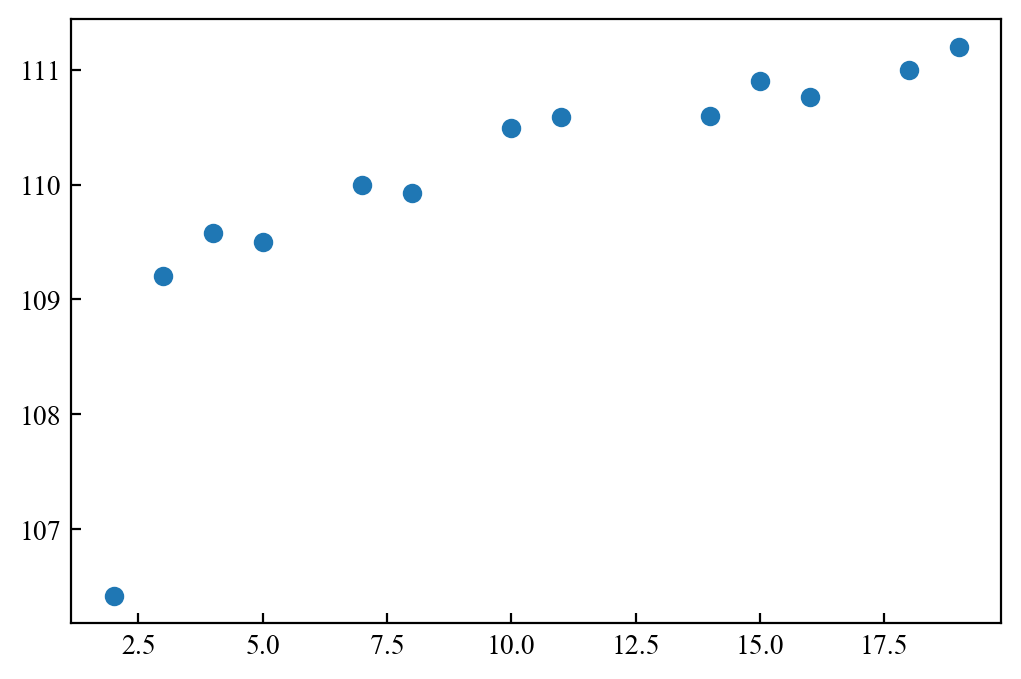

In [10]:
data = np.loadtxt('../../../hw/10第10章  回归分析习题解答/ti10_3.txt')
x, y = data[::2].flatten()[:-1], data[1::2].flatten()[:-1]
plt.scatter(x, y)
plt.show()

In [11]:
n = len(x)

p1 = np.polyfit(x, y, 1)    # 线性 y = a1 + a2*x
yh1 = np.polyval(p1, x)
s1 = sum((y - yh1)**2/(n - 2))

p2 = np.polyfit(x, y, 2)    # 二次多项式 y = a1 + a2*x + a3*x**2
yh2 = np.polyval(p2, x)
s2 = sum((y - yh2)**2/(n - 3))

mat1 = np.vstack([np.ones(n), 1/x]).T
p3 = np.linalg.pinv(mat1) @ y   # 一支双曲线 y = a1 +　a2*(1/x)
yh3 = mat1 @ p3
s3 = sum((y - yh3)**2/(n - 2))

mat2 = np.vstack([np.ones(n), np.log(x)]).T
p4 = np.linalg.pinv(mat2) @ y  # 对数曲线 y = a1 + a2*lnx
yh4 = mat2 @ p4
s4 = sum((y - yh4)**2/(n-2))

print(s1, s2, s3, s4)

0.6022242429932043 0.418070771551971 0.11900366081219563 0.3061389791294068


单支双曲线 $y=a_1+\dfrac{a_2}{x}$ 拟合效果最好

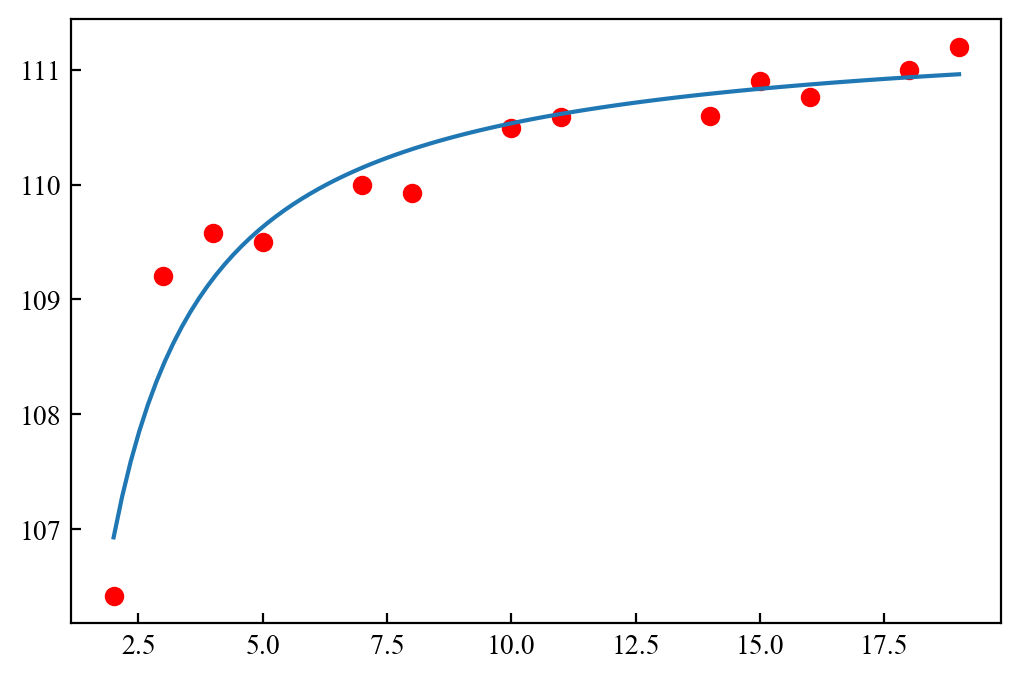

In [12]:
xx = np.linspace(x.min(), x.max(), 100)
n = len(xx)
mat = np.vstack([np.ones(n), 1/xx]).T
yh = mat @ p3

fig, ax = plt.subplots()
ax.plot(xx, yh)
ax.scatter(x, y, c='r')
fig.show()

### 4
向后删除法建立回归模型

In [13]:
data = np.loadtxt('../../../hw/10第10章  回归分析习题解答/ti10_4.txt')
y, x1, x2, x3 = data.T

mod_dic = {'x1': x1, 'x2': x2, 'x3': x3, 'y': y}
mod = sm.formula.ols('y~x1+x2+x3', mod_dic).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5.617
Date:                Sun, 21 Aug 2022   Prob (F-statistic):             0.0355
Time:                        22:04:53   Log-Likelihood:                -67.707
No. Observations:                  10   AIC:                             143.4
Df Residuals:                       6   BIC:                             144.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3035.5364   2168.674     -1.400      0.2

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
mod_1 = sm.formula.ols('y~x1+x2', mod_dic).fit()
print(mod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     8.453
Date:                Sun, 21 Aug 2022   Prob (F-statistic):             0.0136
Time:                        22:04:53   Log-Likelihood:                -68.252
No. Observations:                  10   AIC:                             142.5
Df Residuals:                       7   BIC:                             143.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4187.4155   1630.820     -2.568      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 5
非常规方程拟合

In [15]:
x=np.array([1,2,4,5,7,8,9,10])
y=np.array([1.3,1,0.9,0.81,0.7,0.6,0.55,0.4])
n = len(x)
R = np.vstack([1/x, np.ones(n), x, x**2]).T
A = np.linalg.pinv(R) @ y
A

array([ 0.64983454,  0.59007413,  0.06658214, -0.00912294])

或者使用 ols

In [16]:
mod_dic = {'x': x, 'y': y}
mod = sm.formula.ols('y ~ I(1/x) + x + I(x**2)', mod_dic).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     324.5
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           3.14e-05
Time:                        22:04:53   Log-Likelihood:                 21.208
No. Observations:                   8   AIC:                            -34.42
Df Residuals:                       4   BIC:                            -34.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5901      0.121      4.885      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 6
求一定赔率对应的自变量

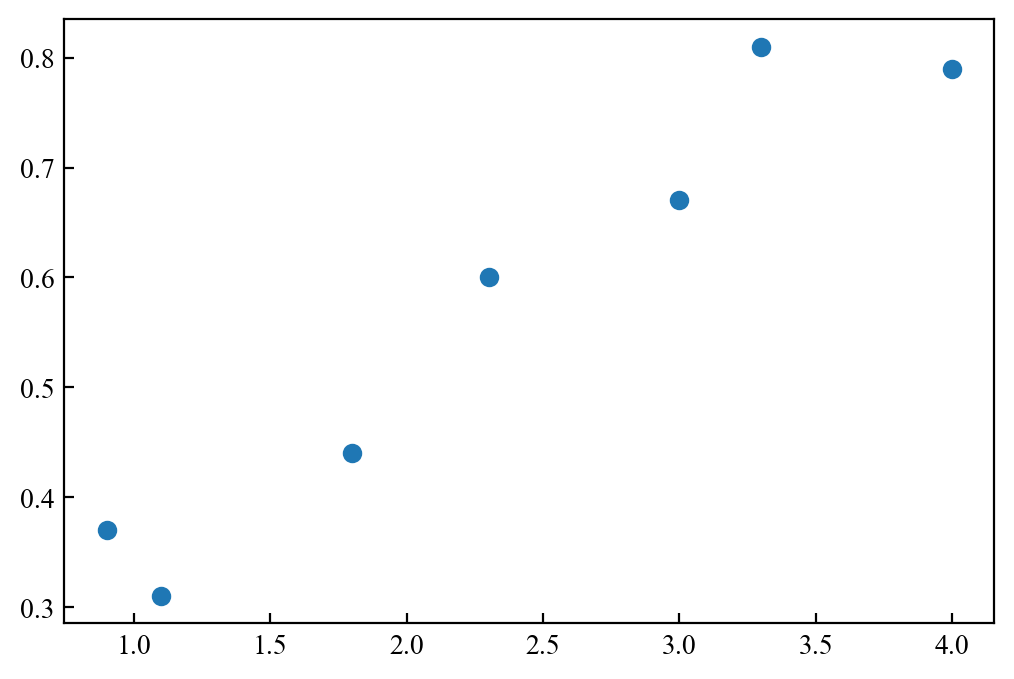

In [17]:
data = np.loadtxt('../../../hw/10第10章  回归分析习题解答/ti10_6.txt')
x, p = data
plt.scatter(x, p)
plt.show()

In [18]:
y = np.log(p/(1-p))
X = sm.add_constant(x)
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     60.57
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           0.000561
Time:                        22:04:54   Log-Likelihood:                0.44013
No. Observations:                   7   AIC:                             3.120
Df Residuals:                       5   BIC:                             3.012
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4007      0.245     -5.727      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [19]:
from scipy.optimize import root

f = lambda x: mod.predict(np.array([1, x], dtype=object))[0]     # 赔率为 1
root(f, 0)['x'][0]  # 赔率为 1 时的剂量

1.895328345215523